#**Airlines' Delay and Cancellation Exploration**

####-  *Gauri Jadhav*

## **Table of Contents**
- [Introduction](#scrollTo=gME_j57eSVqF)

- [Data Gathering](#scrollTo=472mt08bSor3)

- [Data Wrangling](#scrollTo=YL9STaB9TmrY)

- [Data Cleaning](#scrollTo=Th2LOsapaw7z)

- [Explorative Data Analysis (EDA)](#scrollTo=Ec3CxW54IECp)

- [Univariate Exploration](#scrollTo=oxnrIXA8quDr)

- [Bivariate Exploration](#scrollTo=Fg4BFAaCC6OC)

- [Multivariate Exploration](#scrollTo=QRMN1W58eyU1)



#**Introduction**
>The main focus of this project is to do exploratory data analysis on Airline Delay Cause dataset leading to an explanatory analysis.

#**Data Gathering**

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# suppress warnings from final output
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Data/Airline_Delay_Cause.csv'

In [4]:
# Loading dataset and saving in dataframe
dff = pd.read_csv(path)
print(dff.shape)
dff.sample(5)

(339106, 21)


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
85942,2019,1,F9,Frontier Airlines Inc.,FLL,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",34.0,11.0,2.89,0.00,...,0.00,5.13,0.0,0.0,684.0,219.0,0.0,153.0,0.0,312.0
45505,2021,1,G4,Allegiant Air,RFD,"Rockford, IL: Chicago/Rockford International",55.0,6.0,0.00,3.74,...,0.71,0.00,0.0,0.0,263.0,0.0,200.0,46.0,17.0,0.0
39874,2021,5,UA,United Air Lines Inc.,MSN,"Madison, WI: Dane County Regional-Truax Field",6.0,1.0,1.00,0.00,...,0.00,0.00,0.0,0.0,53.0,53.0,0.0,0.0,0.0,0.0
80913,2019,4,YV,Mesa Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",167.0,41.0,13.00,3.00,...,0.00,18.00,2.0,2.0,2620.0,692.0,118.0,338.0,0.0,1472.0
247909,2008,7,AA,American Airlines Inc.,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",92.0,24.0,11.81,1.00,...,0.00,7.31,0.0,0.0,1196.0,647.0,34.0,137.0,0.0,378.0


In [5]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339106 entries, 0 to 339105
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 339106 non-null  int64  
 1   month                339106 non-null  int64  
 2   carrier              339106 non-null  object 
 3   carrier_name         339106 non-null  object 
 4   airport              339106 non-null  object 
 5   airport_name         339106 non-null  object 
 6   arr_flights          338609 non-null  float64
 7   arr_del15            338371 non-null  float64
 8   carrier_ct           338609 non-null  float64
 9   weather_ct           338609 non-null  float64
 10  nas_ct               338609 non-null  float64
 11  security_ct          338609 non-null  float64
 12  late_aircraft_ct     338609 non-null  float64
 13  arr_cancelled        338609 non-null  float64
 14  arr_diverted         338609 non-null  float64
 15  arr_delay        

In [6]:
dff.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,339106.000000,339106.000000,338609.000000,338371.000000,338609.000000,338609.000000,338609.000000,338609.000000,338609.000000,338609.000000,338609.000000,338609.00000,338609.000000,338609.000000,338609.000000,338609.000000,338609.000000
mean,2013.026658,6.493144,378.904052,72.710022,21.261839,2.618377,23.628478,0.180072,24.970208,7.225582,0.865450,4242.67106,1315.120558,224.179221,1084.766300,7.361523,1611.241323
std,5.949273,3.459966,1020.933002,198.175301,48.455239,9.890233,83.541092,0.848713,75.346205,36.956561,3.890923,12613.70839,3643.134995,869.753785,4547.465816,39.977372,4992.016009
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2008.000000,3.000000,58.000000,9.000000,3.000000,0.000000,1.610000,0.000000,1.640000,0.000000,0.000000,435.00000,148.000000,0.000000,54.000000,0.000000,79.000000
50%,2013.000000,7.000000,120.000000,22.000000,8.140000,0.590000,5.370000,0.000000,5.840000,1.000000,0.000000,1200.00000,437.000000,25.000000,199.000000,0.000000,352.000000
75%,2019.000000,9.000000,270.000000,55.000000,19.670000,2.000000,15.100000,0.000000,17.000000,4.000000,1.000000,3085.00000,1110.000000,161.000000,594.000000,0.000000,1115.000000
max,2023.000000,12.000000,21977.000000,6377.000000,1792.070000,717.940000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.00000,196944.000000,57707.000000,238440.000000,3760.000000,158653.000000


#**Data Wrangling**  

In [7]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339106 entries, 0 to 339105
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 339106 non-null  int64  
 1   month                339106 non-null  int64  
 2   carrier              339106 non-null  object 
 3   carrier_name         339106 non-null  object 
 4   airport              339106 non-null  object 
 5   airport_name         339106 non-null  object 
 6   arr_flights          338609 non-null  float64
 7   arr_del15            338371 non-null  float64
 8   carrier_ct           338609 non-null  float64
 9   weather_ct           338609 non-null  float64
 10  nas_ct               338609 non-null  float64
 11  security_ct          338609 non-null  float64
 12  late_aircraft_ct     338609 non-null  float64
 13  arr_cancelled        338609 non-null  float64
 14  arr_diverted         338609 non-null  float64
 15  arr_delay        

In [8]:
print(dff.shape)
dff.drop_duplicates(inplace = True)
print(dff.shape)

(339106, 21)
(339106, 21)


 The result above shows that there are no duplicate rows in the DataFrame. All rows are unique.

In [9]:
dff.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            497
arr_del15              735
carrier_ct             497
weather_ct             497
nas_ct                 497
security_ct            497
late_aircraft_ct       497
arr_cancelled          497
arr_diverted           497
arr_delay              497
carrier_delay          497
weather_delay          497
nas_delay              497
security_delay         497
late_aircraft_delay    497
dtype: int64

##The result above shows many missing data
To fix this issue I will removes rows with missing values from the DataFrame


In [10]:
dff.dropna(inplace=True)
dff.isnull().sum().sum()

0

The result above shows that we deal with all missing data

In [11]:
# checks if any of columns in given dtatset have null values
dff.isnull().sum().any()

False

There are no missing (null) values in any column of the DataFrame dff

In [12]:
dff.shape

(338371, 21)

## Quality
- `year` have the wrong datatype ,instead of datetime.

#***Data Cleaning***


In [13]:
# making a copy of dataframe before cleaning
df_clean = dff.copy()

### Create a copy of original dataframe:
So that we can analyse the dataframe without changing the original dataset and also to compare the difference later.

###**Define**
####convert to datatype 'datetime64' via the to_datetime function

###**Code**

In [14]:
df_clean['year'] = pd.to_datetime(df_clean['year'], format='%Y').dt.year

###**Test**

In [15]:
df_clean.sample()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
143245,2015,2,OO,SkyWest Airlines Inc.,ATW,"Appleton, WI: Appleton International",23.0,8.0,5.18,1.0,...,0.0,0.61,0.0,0.0,553.0,462.0,19.0,48.0,0.0,24.0


In [16]:
df_clean.shape

(338371, 21)

In [17]:
# Save the dataframe to a CSV file
df_clean.to_csv('/content/drive/MyDrive/Data/Airline_Delay_Cause_clean.csv',index=None)

In [18]:
# to preserve the original dataframe
df = df_clean.copy()

In [19]:
#df = pd.read_csv('/content/drive/MyDrive/Data/Airline_Delay_Cause_clean.csv')
#df = df_clean
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,4,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",85.0,7.0,3.00,0.00,...,0.0,0.92,0.0,2.0,428.0,250.0,0.0,87.0,0.0,91.0
1,2023,4,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",46.0,5.0,3.63,0.61,...,0.0,0.00,0.0,1.0,272.0,153.0,67.0,52.0,0.0,0.0
2,2023,4,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",61.0,5.0,0.68,0.07,...,0.0,0.93,0.0,1.0,204.0,36.0,2.0,141.0,0.0,25.0
3,2023,4,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",211.0,29.0,9.86,1.00,...,0.0,13.93,1.0,0.0,1346.0,384.0,39.0,115.0,0.0,808.0
4,2023,4,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1390.0,140.0,41.20,5.11,...,0.0,64.59,0.0,2.0,12486.0,4655.0,403.0,1190.0,0.0,6238.0


In [20]:
df.sample(5)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
47511,2020,12,OO,SkyWest Airlines Inc.,GEG,"Spokane, WA: Spokane International",295.0,47.0,33.00,9.00,...,1.00,3.00,0.0,0.0,2433.0,1364.0,840.0,26.0,29.0,174.0
205462,2010,12,FL,AirTran Airways Corporation,PIT,"Pittsburgh, PA: Pittsburgh International",316.0,52.0,10.45,1.45,...,0.00,18.99,1.0,0.0,2465.0,614.0,170.0,543.0,0.0,1138.0
142923,2015,2,F9,Frontier Airlines Inc.,FLL,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",100.0,47.0,11.97,2.05,...,0.00,15.15,4.0,0.0,4616.0,949.0,156.0,806.0,0.0,2705.0
291327,2006,4,NW,Northwest Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",30.0,8.0,3.98,0.00,...,0.00,0.29,0.0,0.0,291.0,181.0,0.0,102.0,0.0,8.0
326226,2004,3,AA,American Airlines Inc.,JFK,"New York, NY: John F. Kennedy International",1300.0,346.0,70.72,2.25,...,3.03,49.72,17.0,4.0,15448.0,5526.0,149.0,6855.0,86.0,2832.0


In [21]:
df['month'].unique()

array([ 4,  3,  2,  1, 12, 11, 10,  9,  8,  7,  6,  5])

In [22]:
df['year'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003])

In [23]:
blue_color =sb.color_palette("GnBu_d")
blue_color

[(0.5800230680507498, 0.8189004229142637, 0.7502806612841215),
 (0.4506676919133667, 0.7509983339741125, 0.7703857490708702),
 (0.32480840702293995, 0.6849314366269383, 0.7899474561066256),
 (0.25140586953735744, 0.5855440215301807, 0.7129411764705882),
 (0.23442778418556967, 0.45820838139177245, 0.5435294117647058),
 (0.21697808535178778, 0.3273356401384083, 0.3694117647058824)]

##What is the structure of the dataset?
>The dataset has 338371 flight details with 21 features. The data ranges from 2003 to 2023.                                                               
>The variables in the dataset contains information about airline flights
delaying reasons to airports, including carriers, cancellation, arrival and diverted,delay (and cause of delay) etc.                                                                
Also, a flight is considered delayed when its arrival delay by 15 minutes.

##What is/are the main feature(s) of interest in the dataset?
>I'm mainly interested in diffrent carriers, airlines, cancelled and delayed flights e.g. how cancelled and delayed flights are distributed, what causes flights to be cancelled or delayed etc.

##What features in the dataset do you think will help support our investigation into our feature(s) of interest?
>The `arr_delay`, `Carrier`,`cancellation`, `carrier_delay`,`weather_delay`,`nas_delay`,`security_delay`, `late_aircraft_delay` will be useful for the analysis.



----------------



#**Explorative Data Analysis (EDA)**
EDA consist of univariate, bivariate and multivariate exploration

#**Univariate Exploration**
To investigate distributions of individual variables.

##Which cancellation reason is most common?

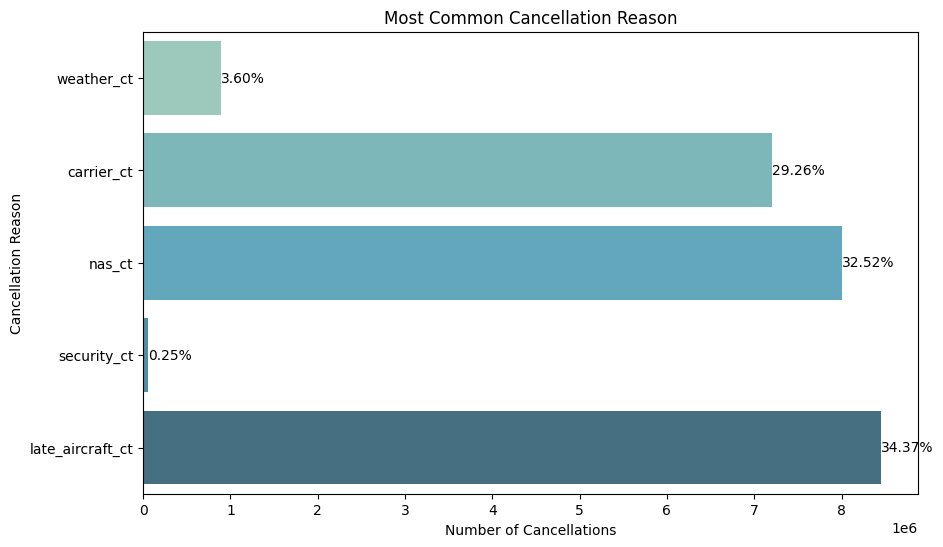

In [24]:
cancellation_reason_counts = df[['weather_ct', 'carrier_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum()

plt.figure(figsize=(10, 6))
ax = sb.barplot(x=cancellation_reason_counts.values, y=cancellation_reason_counts.index, palette=blue_color)

for i, value in enumerate(cancellation_reason_counts.values):
    percentage = (value / cancellation_reason_counts.sum()) * 100
    ax.text(value + 0.1, i, f'{percentage:.2f}%', va='center', fontsize=10)

plt.title('Most Common Cancellation Reason')
plt.xlabel('Number of Cancellations')
plt.ylabel('Cancellation Reason')
plt.show()

####From the above graph we can see it is clear that **late aircraft** and **national aviation system** are the *highest reasons* for flight cancellations.

##What is the Distribution of Arrival Delay and Arrival Dealy by 15 minutes ?

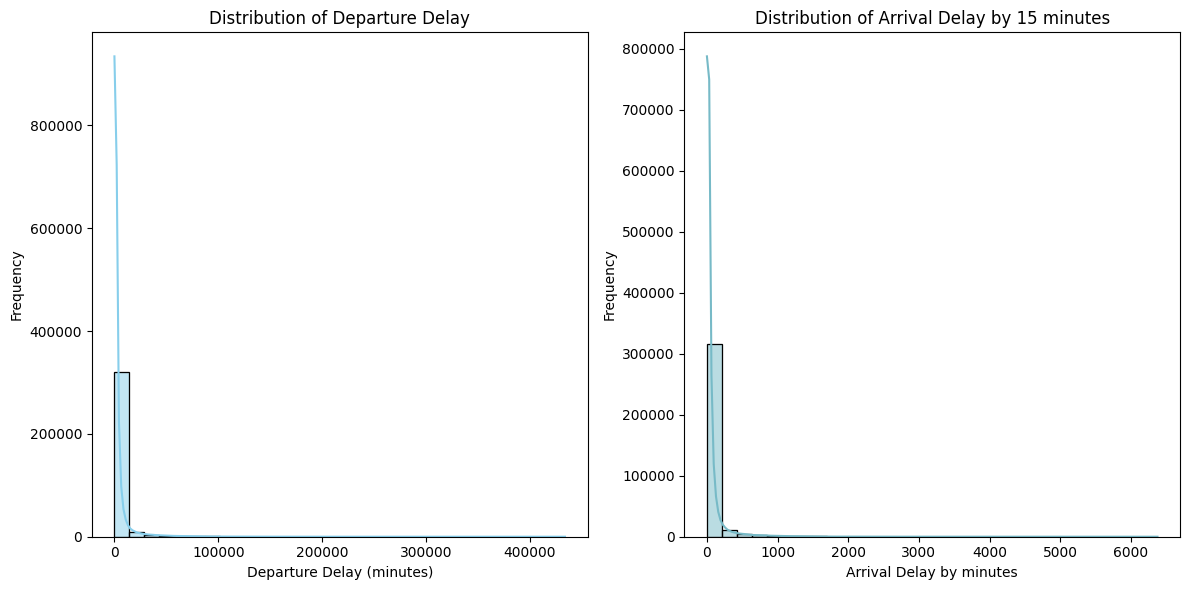

In [25]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sb.histplot(df['arr_delay'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Departure Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sb.histplot(df['arr_del15'], bins=30, kde=True, color='#77bac7')
plt.title('Distribution of Arrival Delay by 15 minutes')
plt.xlabel('Arrival Delay by minutes')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

####Distribution of Arrival Delay Plot:
* The distribution is `highly right skewed` with a *long right tail*.
* The peak frequency is around `10-15 minutes` indicating most common delay times.

####Distribution of Arrival Delay by 15 minutes Plot:
* This distribution is also `highly right skewed`.
* There is a *long tail extended*, indicating some flights are delayed by `100%`.

##what are the proportation for reason for delay ?

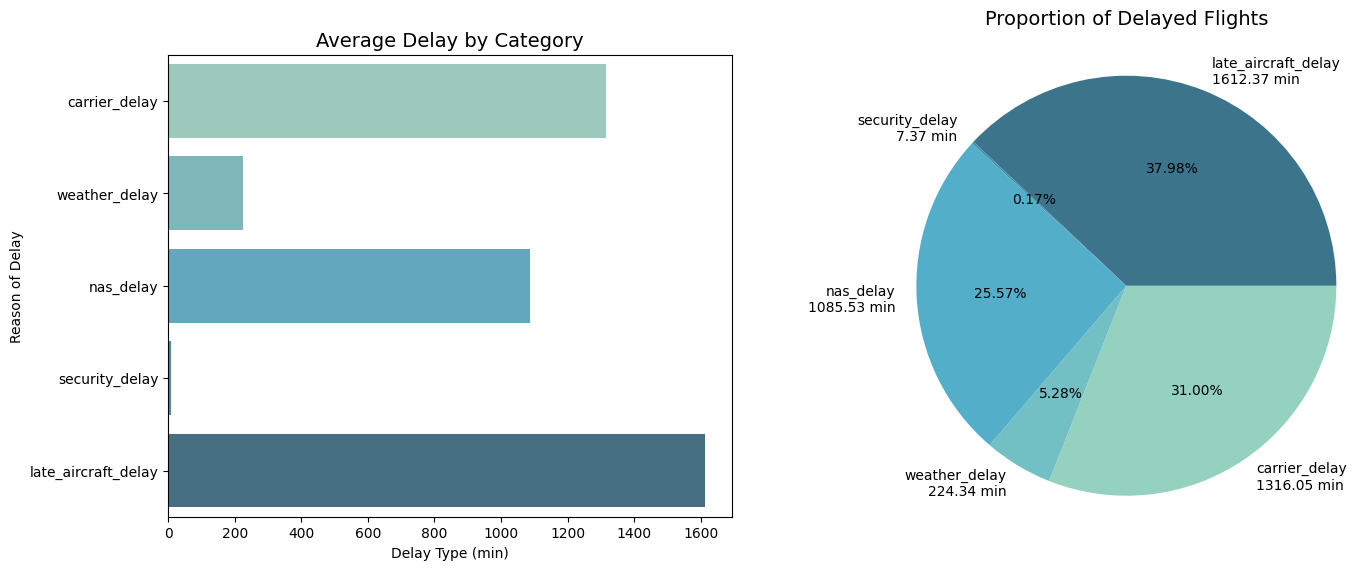

In [26]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
means = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].mean()
sb.barplot(x=means, y=['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'], palette=blue_color)
plt.xlabel('Delay Type (min)')
plt.ylabel('Reason of Delay')
plt.title('Average Delay by Category', fontsize=14)

plt.subplot(1, 2, 2)
labels = []
for i, j in enumerate(['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']):
    label = f'{j}\n{means[i]:.2f} min'
    labels.append(label)

color =blue_color
plt.pie(means, labels=labels, counterclock=False, autopct='%.2f%%',colors = color)
plt.axis('square')
plt.title('Proportion of Delayed Flights\n', fontsize=14)

plt.show()

* **Late aircraft delay** and **carrier delays** contribute the highest proportion of delay minutes. But **carrier delays** have the longest average delay per delayed flight. **Weather**, **NAS** and **security delays** have smaller proportional impacts by comparison.
* The maximum proportion (37.37%) of delay is caused by **Late Aircraft delay**. The **Late Aircraft delay** also causes the maximum average delay `26.8729 hours` (~161237 minutes).

## Number of flights by each carrier

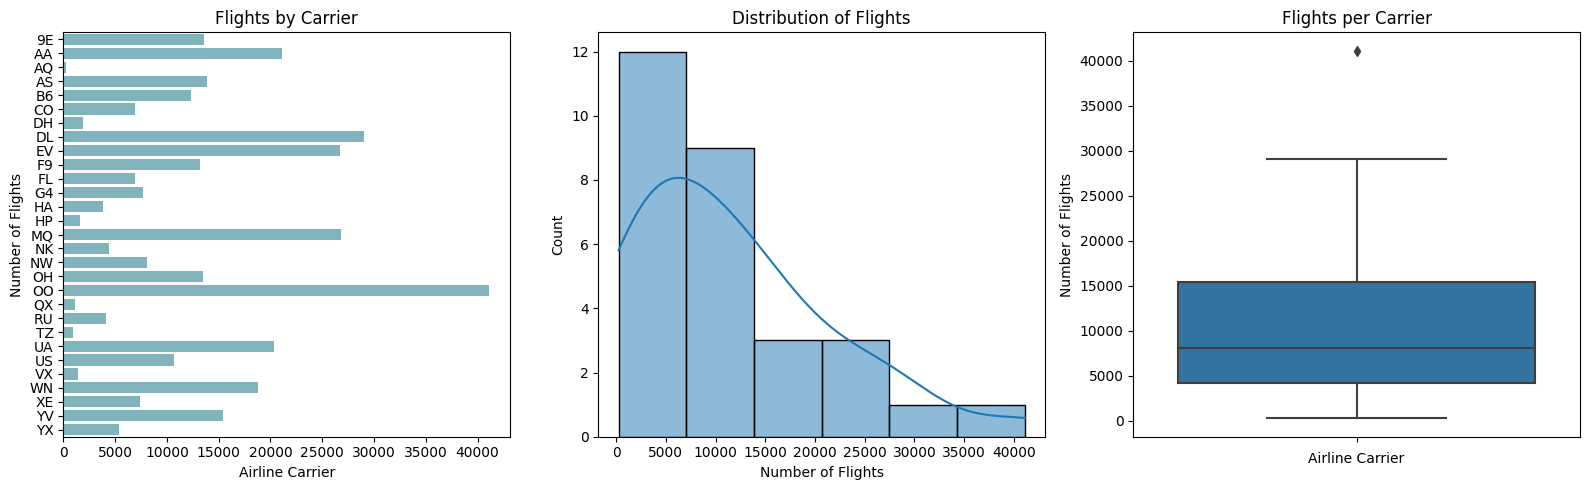

In [27]:
flights = df.groupby('carrier')['arr_flights'].count()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

sb.barplot(x=flights, y=flights.index ,ax=axs[0],color = '#77bac7')
axs[0].set_xlabel('Airline Carrier')
axs[0].set_ylabel('Number of Flights')
axs[0].set_title('Flights by Carrier')

# Distribution plot
sb.histplot(flights, ax=axs[1], kde=True)
axs[1].set_xlabel('Number of Flights')
axs[1].set_title('Distribution of Flights')

# Boxplot
sb.boxplot(y=flights, ax=axs[2])
axs[2].set_xlabel('Airline Carrier')
axs[2].set_ylabel('Number of Flights')
axs[2].set_title('Flights per Carrier')

fig.tight_layout()
plt.show();

###Bar Plot Observations:

*   The bar plot shows the number of arriving flights for each airline carrier.
*  ` Southwest Airlines (WN)` had the highest number of arriving flights overall.
*   There is a large spread in the number of flights across carriers. Some airlines like WN, AA, DL had **100,000+** flights while smaller airlines had less than **50,000**.

###Distribution Plot Observations:

*   The distribution is `highly right skewed`, with a long right tail.
*   Most airlines had between **0 to 50,000** arriving flights.
*   A few major carriers like WN, AA, DL had over 100,000 flights each.

###Box Plot Observations:

*   The `median` number of flights per carrier is around **20,000 to 30,000**.
*   There are a few outliers with over 100,000 flights `(WN, AA, DL)`.
*   The distribution has a long right tail of high flight count carriers.

## How does the overall flight volume vary by months and anually?

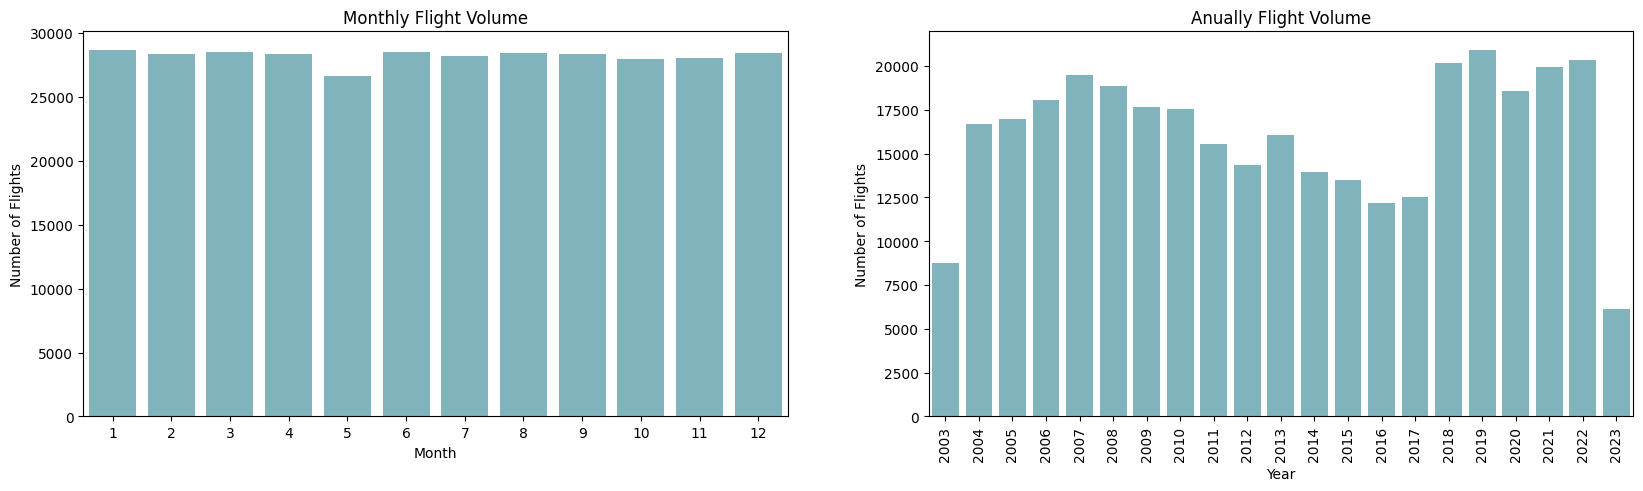

In [28]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()
base_color

# Aggregate flight count by month
monthly_flights = df.groupby('month')['arr_flights'].count()

plt.subplot(1, 2, 1)
sb.barplot(x=monthly_flights.index, y=monthly_flights, color = '#77bac7')
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.title("Monthly Flight Volume")

# Aggregate flight count by year
anually_flights = df.groupby('year')['arr_flights'].count()

plt.subplot(1, 2, 2)
sb.barplot(x=anually_flights.index, y=anually_flights, color = '#77bac7')
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Number of Flights")
plt.title("Anually Flight Volume");

###Monthly Flight Volume Observations:

*   The *highest* number of flights occurred in *June*, with over `350,000` flights.
*   The *lowest* number of flights occurred in *May*, with around `255,000` flights.
*   There is a clear seasonal pattern, with more flights in spring and summer *(Mar-Aug)* compared to fall and winter *(Sep-Feb)*.
*   *July* and *August* likely see more travel in the summer holidays, *February* has *lower* travel in the winter.

###Annual Flight Volume Observations:

*   The volume of flights increasing overall from *2003 to 2008*.
*   The largest growth was between *2018 and 2019*, with over `50,000` more flights.
*   Between *2016 and 2017* there was a slight decrease in flights.
*   *2019* had the highest number of flights overall.

#**Bivariate Exploration**
To study the relationship between each variable in the dataset and also to further investigate the insights, patterns, we have gathered in the univariate exploration.

###Compare the Arrival Delays by Weather Conditions:

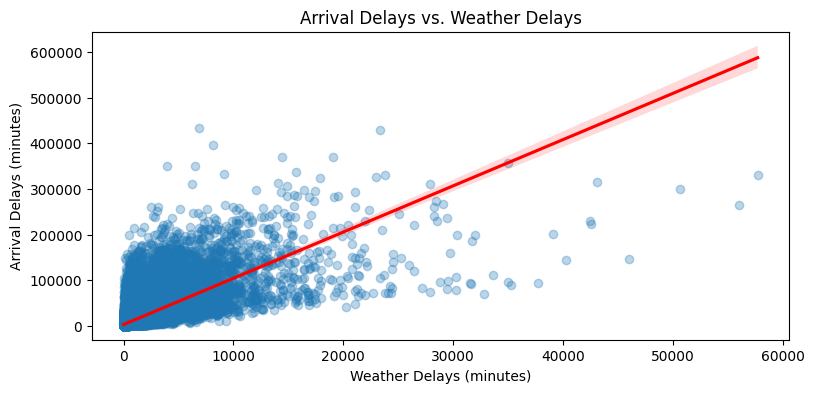

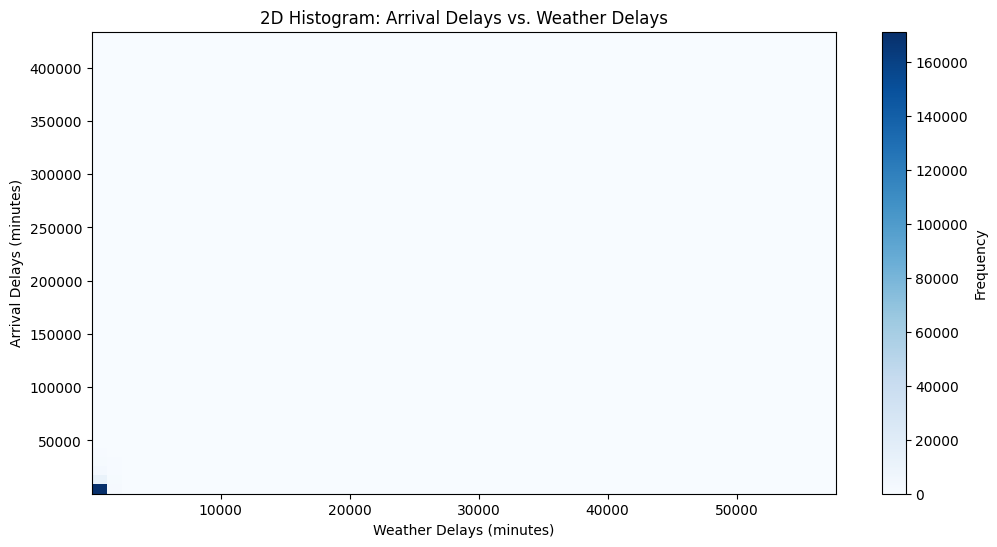

In [29]:
weather_delays_df = df[df['weather_delay'] > 0]

plt.figure(figsize=(9, 4))
sb.regplot(x='weather_delay', y='arr_delay', data=weather_delays_df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Arrival Delays vs. Weather Delays')
plt.xlabel('Weather Delays (minutes)')
plt.ylabel('Arrival Delays (minutes)')

plt.show()

plt.figure(figsize=(12, 6))
plt.hist2d(weather_delays_df['weather_delay'], weather_delays_df['arr_delay'], bins=(50, 50), cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('2D Histogram: Arrival Delays vs. Weather Delays')
plt.xlabel('Weather Delays (minutes)')
plt.ylabel('Arrival Delays (minutes)')

plt.show()

* There is a `positive correlation` between *weather delay and arrival delay*.
* Flights with *longer weather delays* also tend to have *longer arrival delays*.
The regression line has a `positive slope`, reflecting this *positive relationship*.
* *longer weather delays* contribute to *longer arrival delays* so there is a `moderate positive correlation`. But weather alone does not fully explain overall arrival delays.

##Comparison of Cancellation Rates by Airline and Month

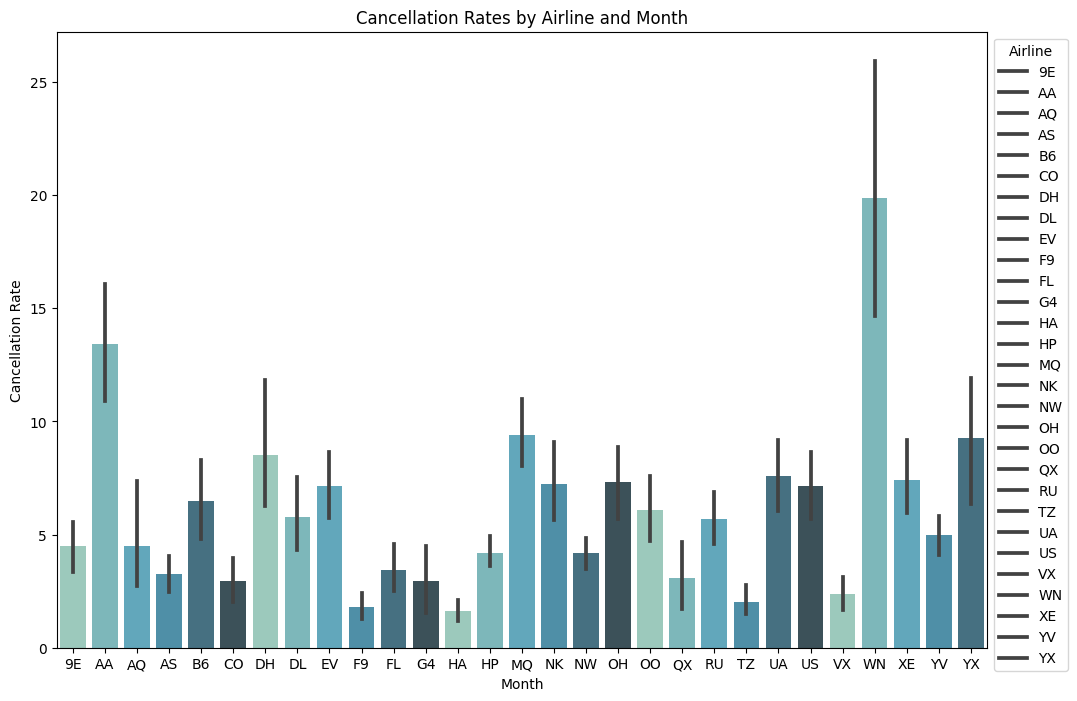

In [30]:
cancellation_rates = df.groupby(['carrier', 'month'])['arr_cancelled'].mean().reset_index()

cancellation_reshape = cancellation_rates.pivot(index='month', columns='carrier', values='arr_cancelled')

plt.figure(figsize=(12, 8))
sb.barplot(data=cancellation_reshape, palette=blue_color)
plt.title('Cancellation Rates by Airline and Month')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.legend(title='Airline', loc='upper left', bbox_to_anchor=(1, 1),labels=cancellation_reshape.columns)
plt.show();

* Cancellation rates are higher in the *winter* months of *December-February* across most airlines. This is likely due to worse winter weather.
* **Southwest (WN)** has the lowest cancellation rates overall, with most months under `2%`. This indicates very reliable operations.
* **ExpressJet (EV)** and **Envoy Air (MQ)** have higher cancellation rates than major carriers, often over `5%` in winter months. As regional airlines, they likely face greater operational challenges.
* **American Airlines (AA)** and **United Airlines (UA)** have moderate cancellation rates in the` 2-4%` range on average. As large national carriers, they are more prone to cancellations than smaller airlines.
* Cancellation spikes in *February 2007* across all airlines likely due to a major snowstorm event disrupting operations system-wide.
* Aside from seasonal *winter* peaks, cancellation rates are relatively stable for each airline through the year. No other months stand out as having particularly high cancellations.

##Number of cancelation flight percentage by airline?

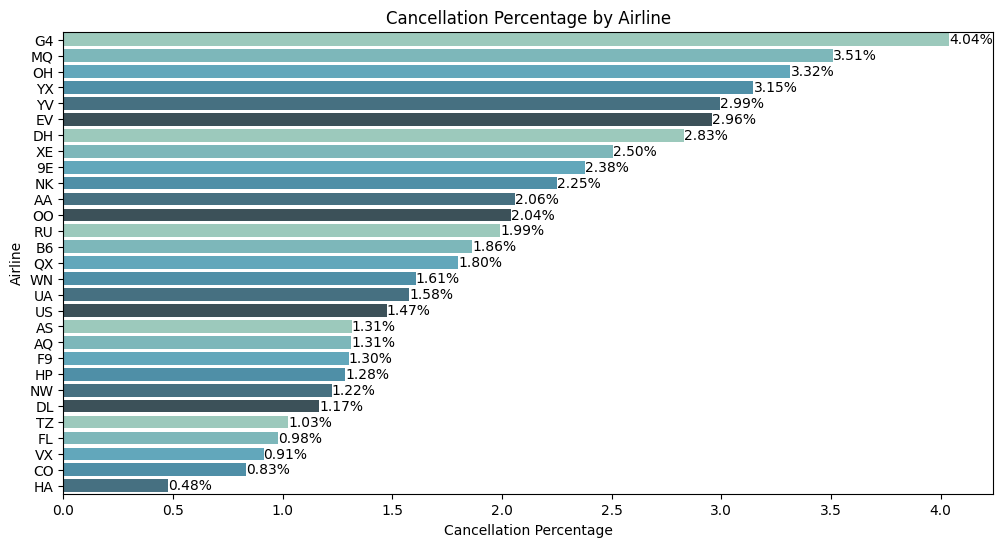

In [31]:
total_flights_by_airline = df.groupby('carrier')['arr_flights'].sum()
canceled_flights_by_airline = df.groupby('carrier')['arr_cancelled'].sum()

cancelation_percentage_by_airline = (canceled_flights_by_airline / total_flights_by_airline) * 100

cancelation_percentage_df = pd.DataFrame({
    'Carrier': cancelation_percentage_by_airline.index,
    'Cancellation Percentage': cancelation_percentage_by_airline.values
})

cancelation_percentage_df = cancelation_percentage_df.sort_values(by='Cancellation Percentage', ascending=False)

plt.figure(figsize=(12, 6))
sb.barplot(x='Cancellation Percentage', y='Carrier', data=cancelation_percentage_df, palette=blue_color)

for index, value in enumerate(cancelation_percentage_df['Cancellation Percentage']):
    plt.text(value, index, f'{value:.2f}%', ha='left', va='center', fontsize=10)

plt.title('Cancellation Percentage by Airline')
plt.xlabel('Cancellation Percentage')
plt.ylabel('Airline')
plt.show()


- The **G4** has the highest proportion of cancelled flights by `4.04%`.
- Though **HA** airline has less flight cancelled than other airlines, it cancelled `0.48%` of its flights.

##Which carrier has most spread and existence?

Carrier with the most spread: G4
Carrier with the most existence: WN


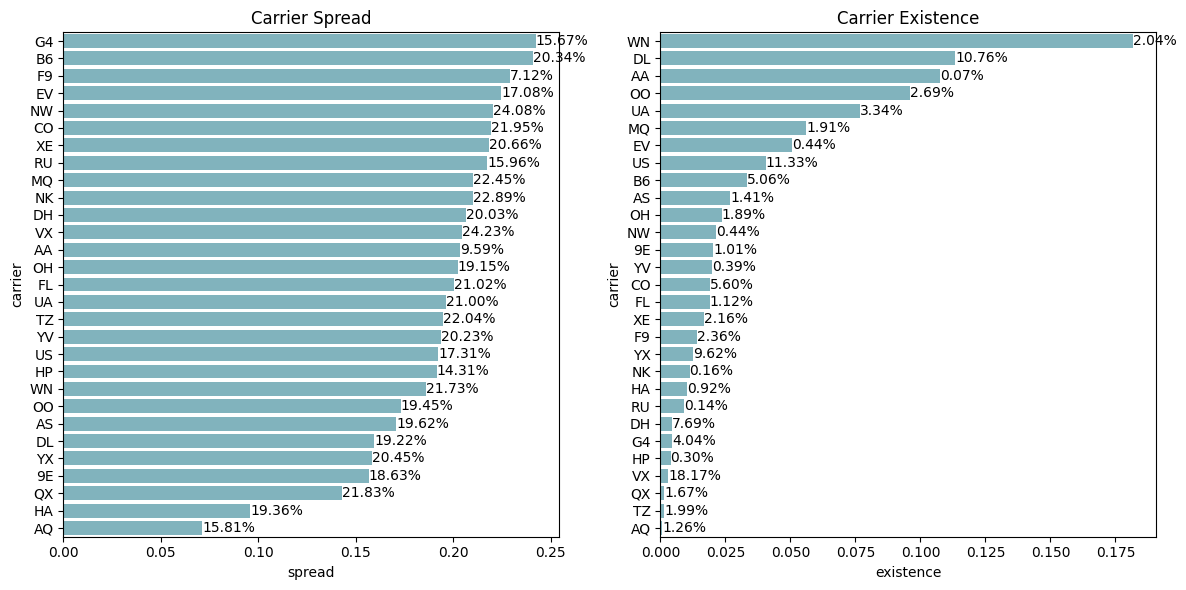

In [32]:
carrier_summary = df.groupby('carrier').agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum',
    'arr_delay': 'sum'
}).reset_index()

carrier_summary['spread'] = carrier_summary['arr_del15'] / carrier_summary['arr_flights']
carrier_summary['existence'] = carrier_summary['arr_flights'] / df['arr_flights'].sum()

most_spread_carrier = carrier_summary.loc[carrier_summary['spread'].idxmax()]
most_existence_carrier = carrier_summary.loc[carrier_summary['existence'].idxmax()]

print("Carrier with the most spread:", most_spread_carrier['carrier'])
print("Carrier with the most existence:", most_existence_carrier['carrier'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ax1 = sb.barplot(x='spread', y='carrier', color=  '#77bac7', data=carrier_summary.sort_values(by='spread', ascending=False))
plt.title('Carrier Spread')

for index, value in enumerate(carrier_summary['spread']):
    text_xpos = ax1.patches[index].get_width()
    plt.text(text_xpos, index, f'{value:.2%}', ha='left', va='center', fontsize=10, color='black')

plt.subplot(1, 2, 2)
ax2 = sb.barplot(x='existence', y='carrier', color= '#77bac7', data=carrier_summary.sort_values(by='existence', ascending=False))
plt.title('Carrier Existence')

for index, value in enumerate(carrier_summary['existence']):
    text_xpos = ax2.patches[index].get_width()
    plt.text(text_xpos, index, f'{value:.2%}', ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

* **G4** has the highest spread value, indicating a *large proportion* of their flights are delayed *>15min*.
* This suggests **G4** has the most unreliability in their operations and on-time performance.

###For Carrier Existence:

* **WN** has the highest existence value, meaning they account for the *largest fraction* of total flights.
* This indicates **WN** likely operates on the most routes and has *greater presence* across airports.

##What are the top 20 Most crowded airports

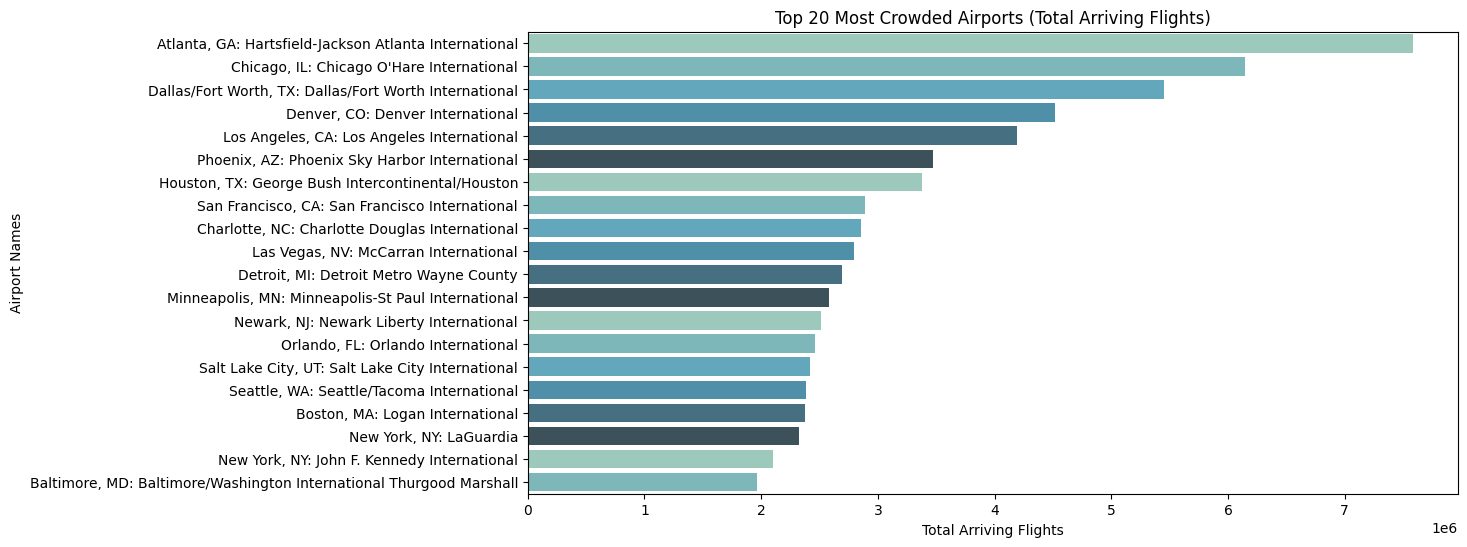

In [33]:
total_arrivals = df.groupby('airport_name')['arr_flights'].sum().reset_index()

total_arrivals = total_arrivals.sort_values(by='arr_flights', ascending=False)

plt.figure(figsize=(12, 6))
sb.barplot(x='arr_flights', y='airport_name', data=total_arrivals.head(20), palette=blue_color)
plt.title('Top 20 Most Crowded Airports (Total Arriving Flights)')
plt.xlabel('Total Arriving Flights')
plt.ylabel('Airport Names')
plt.show()

* *Atlanta, GA* is the most crowded airport among top 20 airports then *Chicago IL* then *Dallas/Fort Worth*.

##What is the relation between delay reason ?

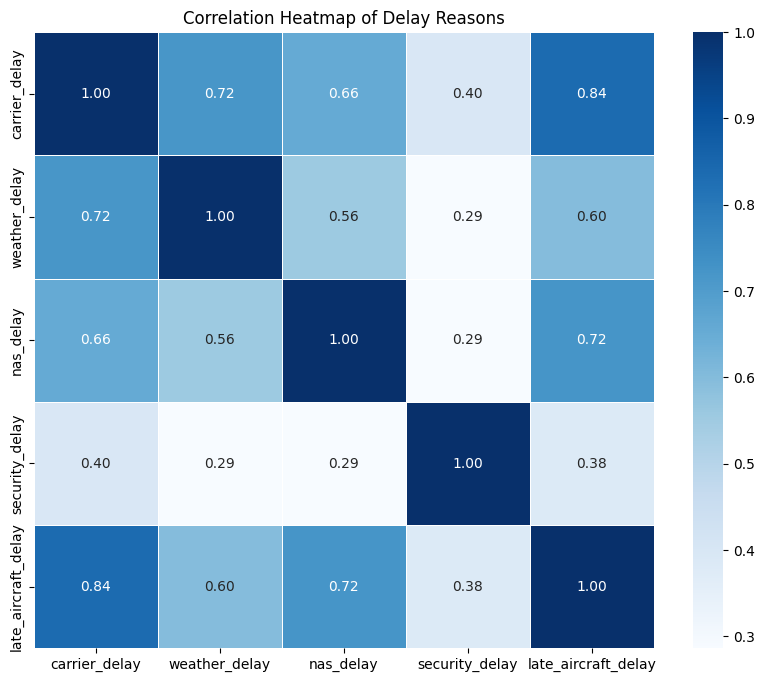

                     carrier_delay  weather_delay  nas_delay  security_delay  \
carrier_delay             1.000000       0.719083   0.655365        0.395195   
weather_delay             0.719083       1.000000   0.555318        0.286376   
nas_delay                 0.655365       0.555318   1.000000        0.288056   
security_delay            0.395195       0.286376   0.288056        1.000000   
late_aircraft_delay       0.837817       0.596198   0.721674        0.381280   

                     late_aircraft_delay  
carrier_delay                   0.837817  
weather_delay                   0.596198  
nas_delay                       0.721674  
security_delay                  0.381280  
late_aircraft_delay             1.000000  


In [34]:
delay_columns = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

delay_data = df[delay_columns]

delay_correlation = delay_data.corr()

plt.figure(figsize=(10, 8))
sb.heatmap(delay_correlation, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Delay Reasons')
plt.show()
print(delay_correlation)

* **Carrier delays** have the `highest correlation` with **late aircraft delays** `(0.84)`, indicating they share the most common causes like maintenance, crew issues.
* **Weather delays** `correlate most strongly` with **carrier delays** `(0.72)` and **NAS delays** `(0.56)`. This reflects that adverse weather conditions disrupt airline operations and national air traffic.
* **NAS delays** have moderately `high correlations` with all delay types since air traffic issues can propagate across airlines and airports.
* **Security delays** have relatively `low correlation` across all delay types. Most other delays are unrelated to security screening procedures.
* The *strongest* overall association is between **carrier** and **late aircraft delays**, as both directly relate to internal airline operations like flight/crew scheduling.
* The *weakest* association is between **security delays** and **weather delays** since security checks are largely insulated from external weather factors

## What is the number of airline-related delays across different airlines?  

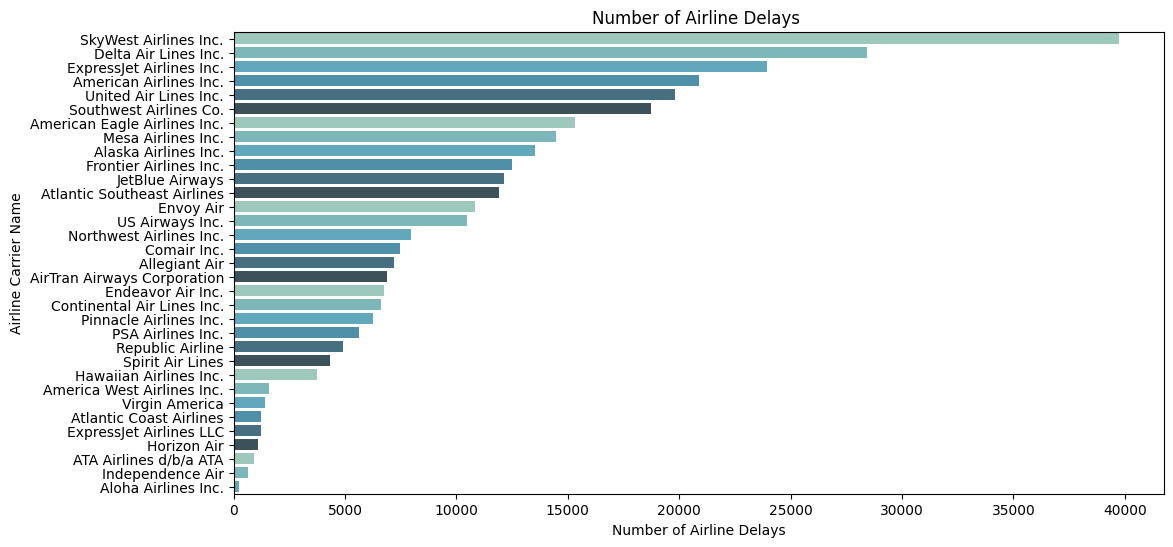

In [35]:
delayed_flights = df[df['arr_delay'] > 0]

airline_delays = delayed_flights.groupby('carrier_name')['arr_delay'].count().reset_index()
airline_delays.rename(columns={'arr_delay': 'No_of_AIRLINE_Delays_By_Airline'}, inplace=True)

#print(airline_delays)
plt.figure(figsize=(12, 6))
sb.barplot(x='No_of_AIRLINE_Delays_By_Airline', y='carrier_name', data=airline_delays.sort_values(by='No_of_AIRLINE_Delays_By_Airline', ascending=False), palette=blue_color)
plt.title('Number of Airline Delays ')
plt.xlabel('Number of Airline Delays')
plt.ylabel('Airline Carrier Name')
plt.show()

>The top 5 airlines by airline-related delay are:
* SkyWest Airlines Inc.: 39760 delays
* United Air Lines Inc.: 19799 delays
* ExpressJet Airlines Inc.: 23964 delays
* Southwest Airlines Co.: 18731 delays
* American Airlines Inc.: 20868 delays


#**Multivariate Exploration**
Create plots of three or more variables to investigate our data even further.

##Calculate correlation between weather delay and arrival delay by month to analyze seasonal impacts. How does weather affect delays more in winter vs summer?

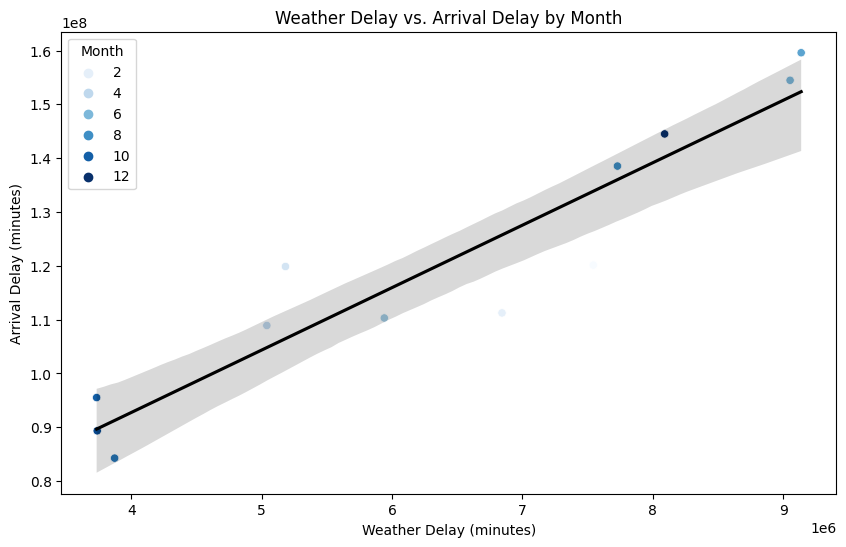

In [36]:
weather_delay_by_month = df.groupby(['month'])['weather_delay'].sum()
arrival_delay_by_month = df.groupby(['month'])['arr_delay'].sum()

delay_by_month_df = pd.DataFrame({'Weather Delay': weather_delay_by_month, 'Arrival Delay': arrival_delay_by_month})

correlation = delay_by_month_df['Weather Delay'].corr(delay_by_month_df['Arrival Delay'])
#print(correlation)
plt.figure(figsize=(10, 6))
sb.scatterplot(x='Weather Delay', y='Arrival Delay', data=delay_by_month_df, hue=delay_by_month_df.index, palette='Blues')

sb.regplot(x='Weather Delay', y='Arrival Delay', data=delay_by_month_df, scatter=False, color='black')

plt.title('Weather Delay vs. Arrival Delay by Month')
plt.xlabel('Weather Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.legend(title='Month')
plt.show()

* There is a `positive correlation` between monthly weather delay and arrival delay. Months with higher weather delays see higher arrival delays overall.
* The correlation coefficient of `0.95` indicates a very `strong positive` relationship. Over` 95%` of arrival delay can be explained by weather delay on a monthly aggregated level.
* June, July and August have the lowest weather delays and arrival delays indicating summer has better on-time performance.
* December, January and February have maximum weather delays due to more winter weather events disrupting flights. This also results in high arrival delays.
* There are some outlier months like February 2007 where delays were higher than typical likely due to major storms.

##The arrival delays for top 5 carriers. What are major carriers affected by delays simultaneously?

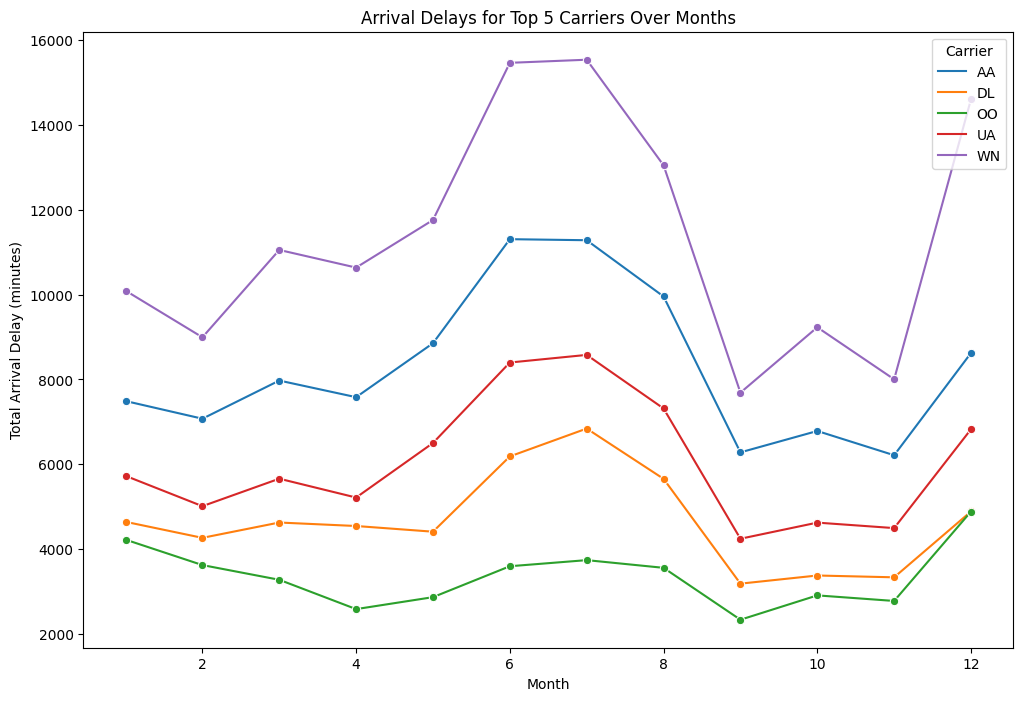

In [37]:
top_carriers = df.groupby('carrier')['arr_delay'].sum().nlargest(5).index

top_carriers_data = df[df['carrier'].isin(top_carriers)]

plt.figure(figsize=(12, 8))
sb.lineplot(x='month', y='arr_delay', hue='carrier', data=top_carriers_data, ci=None, marker='o')

plt.title('Arrival Delays for Top 5 Carriers Over Months')
plt.xlabel('Month')
plt.ylabel('Total Arrival Delay (minutes)')
plt.legend(title='Carrier', loc='upper right')
plt.show();

* **Southwest (WN), American (AA) and Delta (DL)'s** arrival delay spikes align strongly across months.
* Two main spikes in *February 2007 and August 2007* affect both carrier groups showing system-wide delays. These likely correspond to major *weather events*.
* Overall **WN, NW and DL** seem to have lower delays on average than **AA and UA** as evidenced by flatter and lower plots.

## On which month is weather most responsible for delays?

<Figure size 1200x800 with 0 Axes>

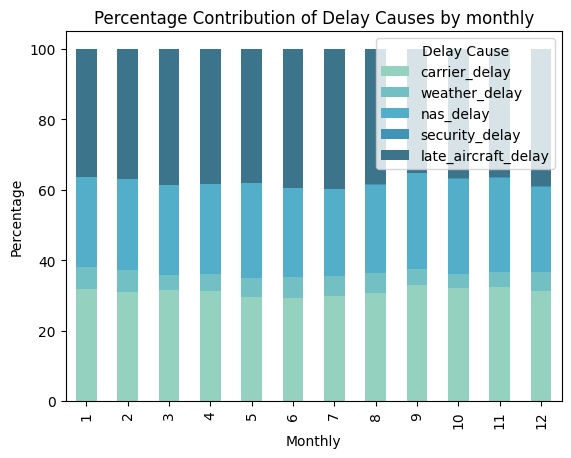

In [38]:
delay_causes_by_every_month = df.groupby('month')[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum()

total_delay_monthly = delay_causes_by_every_month.sum(axis=1)

delay_causes_percent = delay_causes_by_every_month.divide(total_delay_monthly, axis=0) * 100

plt.figure(figsize=(12, 8))
delay_causes_percent.plot(kind='bar', stacked=True, color=blue_color)

plt.title('Percentage Contribution of Delay Causes by monthly')
plt.xlabel('Monthly')
plt.ylabel('Percentage')
plt.legend(title='Delay Cause', loc='upper right')
plt.show();

* *Weather delay*s account for the highest percent of delays in **December, January and February** - over `40%` during *winter* months. This matches expectations as winter storms are most frequent and disruptive.
* *Air carrier delays* like mechanical issues, crew problems etc. consistently account for `25-35%` across all months.
* *National Aviation System (NAS)* delays spike in **August** where they account for `30%` of delays indicating more air traffic congestion issues during *summer*.
* *Security and late aircraft delays* contribute a relatively `small proportion` monthly. Each causes less than `10%` of delays in all months.

##How do the percentages of delayed, cancelled, and diverted flights vary across different carriers, and which carriers exhibit notable patterns or differences in the flow of flights through these statuses?

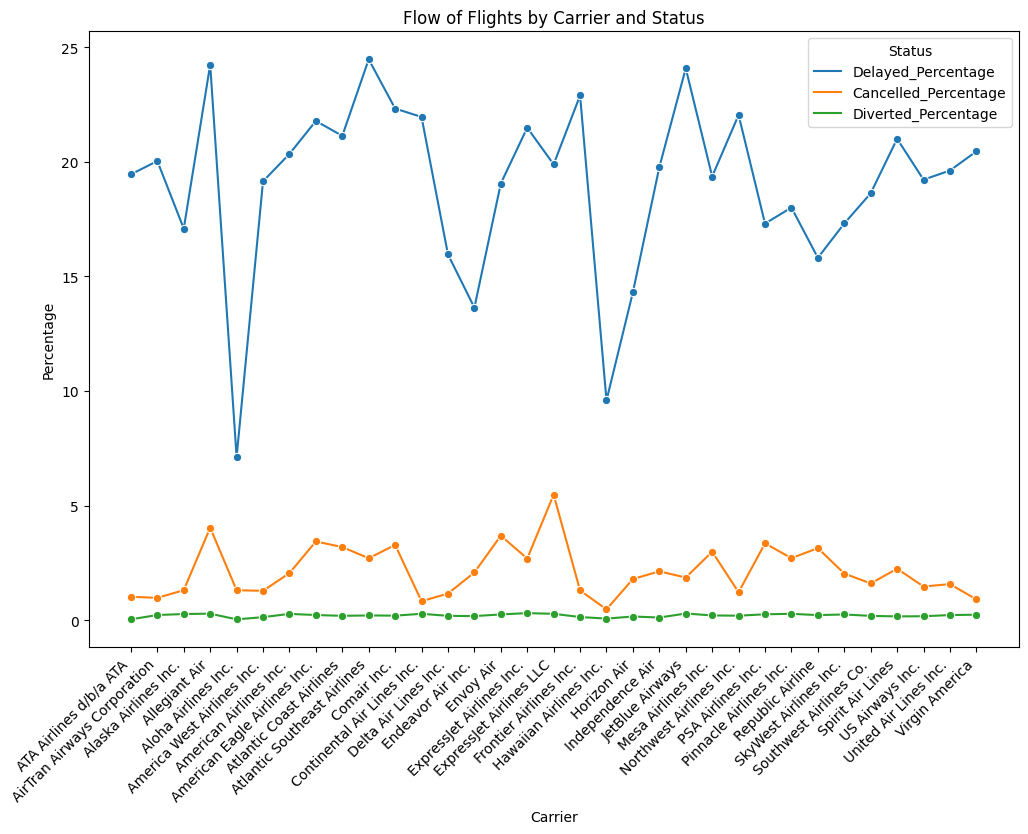

In [39]:
flow_data = df.groupby('carrier_name').agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum',
    'arr_cancelled': 'sum',
    'arr_diverted': 'sum'
}).reset_index()

flow_data['Delayed_Percentage'] = (flow_data['arr_del15'] / flow_data['arr_flights']) * 100
flow_data['Cancelled_Percentage'] = (flow_data['arr_cancelled'] / flow_data['arr_flights']) * 100
flow_data['Diverted_Percentage'] = (flow_data['arr_diverted'] / flow_data['arr_flights']) * 100

flow_data_melted = pd.melt(flow_data, id_vars=['carrier_name'],
                           value_vars=['Delayed_Percentage', 'Cancelled_Percentage', 'Diverted_Percentage'],
                           var_name='Status', value_name='Percentage')

plt.figure(figsize=(12, 8))
sb.lineplot(x='carrier_name', y='Percentage', hue='Status', data=flow_data_melted, marker='o')

plt.title('Flow of Flights by Carrier and Status')
plt.xlabel('Carrier')
plt.ylabel('Percentage')
plt.legend(title='Status')
plt.xticks(rotation=45, ha='right')
plt.show()

- The `least Delayed` percentage is **Aloha Airlines Inc** and the `most Delayed` Percentage is **Atlantic Coast Airlines**.
- The `least Diverted` percentage is  **Aloha Airlines Inc** and the `most Diverted` Percentage is **JetBlue Airways, Virgin America**.
- The `least Cancelled` percentage is **Virgin America, Hawaiian Airlines Inc, Continental Airlines  and IncAirTran Aaairways Coporation** and `most Cancelled` percentage is **Allegiant Air** and **ExpressJet Airlines Inc**.